In [158]:
import numpy as np  #For performing numrical computations such as array(Multidimensional array  like ndarray),mathematical functions such as linear algebra ,random number generation
import pandas as pd  # It provides tools to handle, clean, and analyze data efficiently.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [159]:
df=pd.read_csv("C:/Users/omkar/Downloads/mail_data.csv")
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [160]:
data=df.where((pd.notnull(df)), '')

In [161]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [162]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [163]:
data.shape

(5572, 2)

In [164]:
data.loc[data['Category']=='spam','Category',]=0
data.loc[data['Category']=='ham','Category',]=1

In [165]:
X=data['Message']
Y=data['Category']

In [166]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [167]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [168]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)  #train=80%,test=20%

In [169]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [170]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [171]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int') 

In [172]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [173]:
print(X_train_features)

  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24920025316220423
  (4455, 3922)	0.31287563163368587
  (4455, 6916)	0.19636985317119715
  (4455, 4715)	0.30714144758811196
  (

In [174]:
model= LogisticRegression()

In [175]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [176]:
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)


In [177]:
print("Accuracy of training dataset:",accuracy_on_training_data)

Accuracy of training dataset: 0.9676912721561588


In [178]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [179]:
print("Accuracy of testing dataset:",accuracy_on_test_data)

Accuracy of testing dataset: 0.9668161434977578


In [186]:
input_your_mail = ["Lol your always so convincing."]

input_data_features = feature_extraction.transform(input_your_mail)

prediction=model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
    print("Its a Unspam Mail...............")
else:
    print('Its a spam mail.................')


[1]
Its a Unspam Mail...............


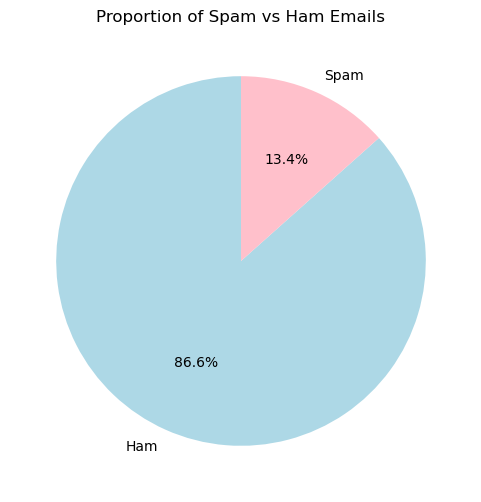

In [192]:
# Calculate distribution
counts = data['Category'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Ham', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Proportion of Spam vs Ham Emails')
plt.show()


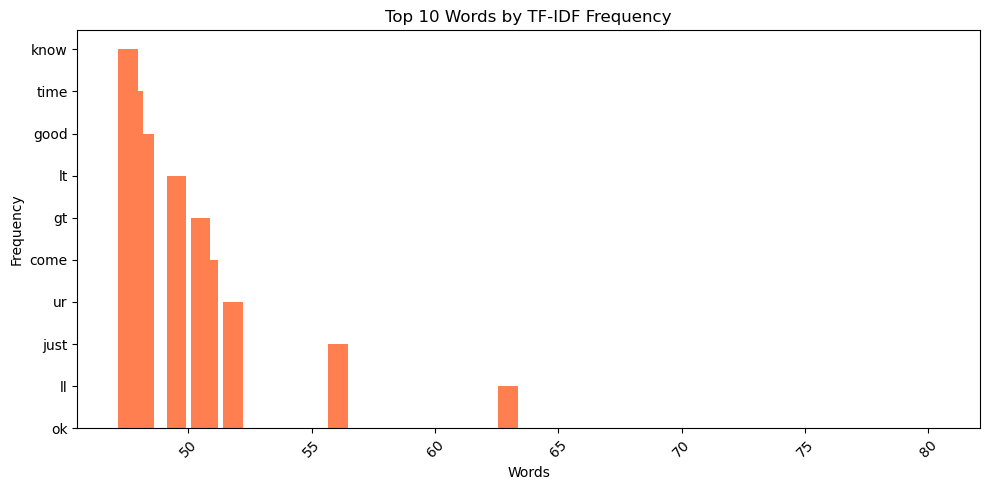

In [194]:
import numpy as np

# Get feature names and their importance from TfidfVectorizer
features = feature_extraction.get_feature_names_out()
word_importance = X_train_features.sum(axis=0).A1
word_freq = sorted(zip(word_importance, features), reverse=True)[:10]  # Top 10 words

# Data for bar chart
words, frequencies = zip(*word_freq)

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies, color='coral')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words by TF-IDF Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


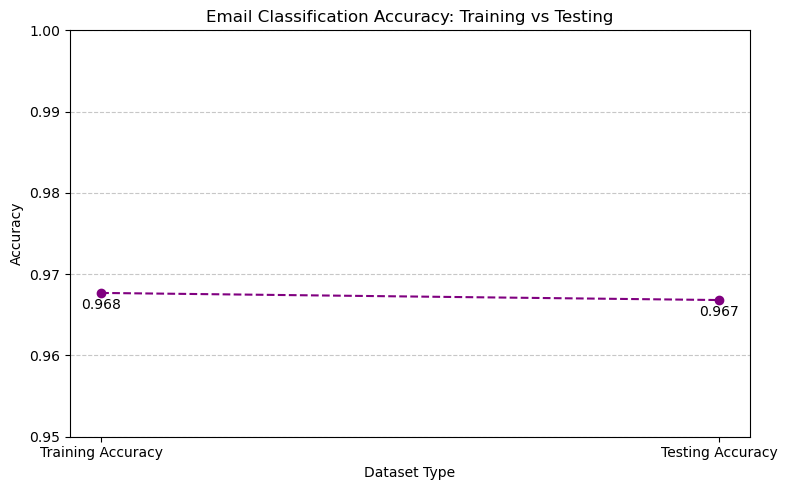

In [196]:
# Data for the graph
categories = ['Training Accuracy', 'Testing Accuracy']
accuracies = [0.9676912721561588, 0.9668161434977578]

# Create the line chart
plt.figure(figsize=(8, 5))
plt.plot(categories, accuracies, marker='o', color='purple', linestyle='--')
plt.ylim(0.95, 1.0)  # Setting the y-axis range
plt.xlabel('Dataset Type')
plt.ylabel('Accuracy')
plt.title('Email Classification Accuracy: Training vs Testing')

# Annotate points
for i, acc in enumerate(accuracies):
    plt.text(i, acc - 0.002, f"{acc:.3f}", ha='center', fontsize=10)

# Add gridlines and display the graph
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


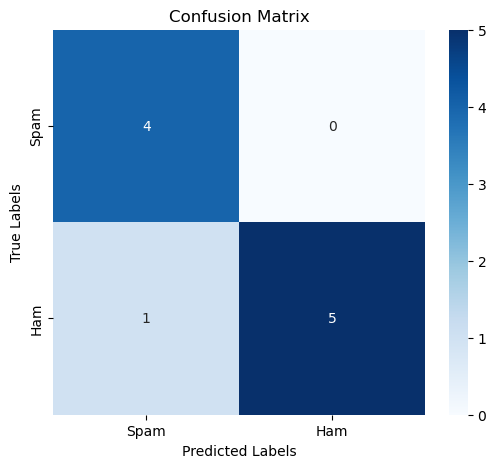

In [202]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example data (replace with actual values from your predictions)
true_labels = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # Replace with Y_test
predicted_labels = [1, 0, 1, 1, 0, 0, 0, 1, 0, 1]  # Replace with predictions

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
